# This notebook is to try to load the data, join it, and evaluate if it can be used for the project

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from time import time
import re
import datetime as dt

%matplotlib inline

%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

%load_ext autoreload
%autoreload 2

# Constants definition
DATA_PATH = '../data/'
PROJECT_ROOT = '../'
SRC = PROJECT_ROOT + 'src/'

EXCHANGE_RATES_PREFIX = 'currencies'

sys.path.append(SRC)

Populating the interactive namespace from numpy and matplotlib


In [2]:
curr1_df = pd.read_csv(DATA_PATH + EXCHANGE_RATES_PREFIX + '1.csv', header=1, skipfooter=1)
print(curr1_df.shape)
curr1_df.head()

(540, 21)


/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MMM YYYY,USD/DZD,USD/ARS,USD/AUD,USD/ATS,USD/BSD,USD/BHD,USD/BBD,USD/BEF,USD/BMD,...,USD/GBP,USD/BGN,USD/CAD,USD/CLP,USD/CNY,USD/COP,USD/HRK,USD/CYP,USD/CZK,USD/DKK
0,Jan 1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022513,NaN,...,2.5703,NaN,0.99411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb 1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022809,NaN,...,2.6035,NaN,0.99528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar 1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022757,NaN,...,2.6179,NaN,1.00152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr 1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022673,NaN,...,2.6102,NaN,1.00430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May 1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022737,NaN,...,2.6124,NaN,1.01119,NaN,NaN,NaN,NaN,NaN,NaN,NaN


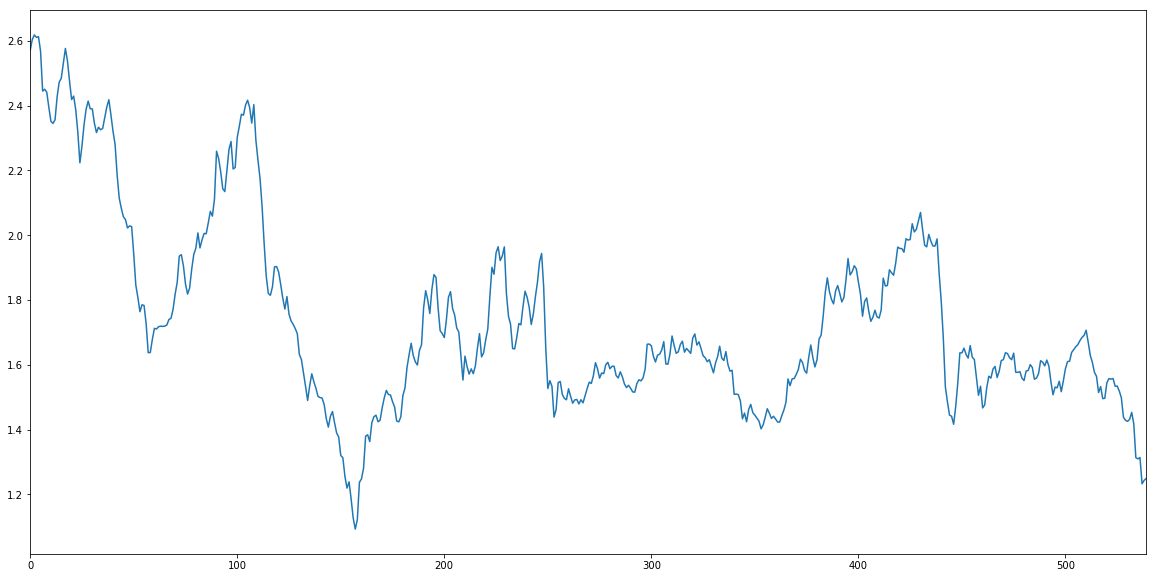

In [3]:
curr1_df['USD/GBP'].plot()

### Conversion to dates 

In [4]:
curr1_df.iloc[:,0].head()

0    Jan 1972
1    Feb 1972
2    Mar 1972
3    Apr 1972
4    May 1972
Name: MMM YYYY, dtype: object

In [5]:
example_ds = curr1_df.iloc[0,0]
example_ds

'Jan 1972'

In [6]:
m_str, y_str = example_ds.split()
print(m_str)
print(y_str)

Jan
1972


In [7]:
MONTHS = {'Jan': 1,
          'Feb': 2,
          'Mar': 3,
          'Apr': 4,
          'May': 5,
          'Jun': 6,
          'Jul': 7,
          'Aug': 8,
          'Sep': 9,
          'Oct': 10,
          'Nov': 11,
          'Dec': 12}

def parse_date(date_string):
    m_str, y_str = date_string.split()
    month = MONTHS[m_str]
    year = int(y_str)
    return dt.datetime(year, month, 15)

In [8]:
parse_date(example_ds)

datetime.datetime(1972, 1, 15, 0, 0)

In [9]:
curr1_df.iloc[:,0].apply(parse_date).head(13)

0    1972-01-15
1    1972-02-15
2    1972-03-15
3    1972-04-15
4    1972-05-15
5    1972-06-15
6    1972-07-15
7    1972-08-15
8    1972-09-15
9    1972-10-15
10   1972-11-15
11   1972-12-15
12   1973-01-15
Name: MMM YYYY, dtype: datetime64[ns]

In [10]:
import preprocessing as pp

In [11]:
curr1_df.iloc[:,0].apply(pp.parse_date).head(13)

0    1972-01-15
1    1972-02-15
2    1972-03-15
3    1972-04-15
4    1972-05-15
5    1972-06-15
6    1972-07-15
7    1972-08-15
8    1972-09-15
9    1972-10-15
10   1972-11-15
11   1972-12-15
12   1973-01-15
Name: MMM YYYY, dtype: datetime64[ns]

In [12]:
os.listdir(DATA_PATH)

['currencies5.csv',
 'exchange_rates.csv',
 'currencies2.csv',
 'API_FP.CPI.TOTL_DS2_en_csv_v2.csv',
 'filtered_rates.csv',
 'Metadata_Indicator_API_FP.CPI.TOTL_DS2_en_csv_v2.csv',
 'ISOCurrencyCodes081507.xls',
 'ISOCurrencyCodes081507.csv',
 'currencies3.csv',
 'currencies4.csv',
 'currencies1.csv',
 'Metadata_Country_API_FP.CPI.TOTL_DS2_en_csv_v2.csv']

In [13]:
import re

pattern = re.compile(EXCHANGE_RATES_PREFIX + '\d.csv')
exchange_filenames = sorted([pattern.match(name).group(0) for name in os.listdir(DATA_PATH) if pattern.match(name) is not None])

In [14]:
exchange_filenames

['currencies1.csv',
 'currencies2.csv',
 'currencies3.csv',
 'currencies4.csv',
 'currencies5.csv']

In [15]:
file_path = DATA_PATH + EXCHANGE_RATES_PREFIX + '1.csv'
data_df = pd.read_csv(file_path, header=1, skipfooter=1)

/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [16]:
DATE = 'date'
data_df[DATE] = data_df.iloc[:,0].apply(parse_date)
data_df.set_index(DATE).drop(data_df.columns[0], axis=1)

,USD/DZD,USD/ARS,USD/AUD,USD/ATS,USD/BSD,USD/BHD,USD/BBD,USD/BEF,USD/BMD,USD/BRL,USD/GBP,USD/BGN,USD/CAD,USD/CLP,USD/CNY,USD/COP,USD/HRK,USD/CYP,USD/CZK,USD/DKK
date,,,,,,,,,,,,,,,,,,,,
1972-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022513,NaN,NaN,2.5703,NaN,0.99411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022809,NaN,NaN,2.6035,NaN,0.99528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022757,NaN,NaN,2.6179,NaN,1.00152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022673,NaN,NaN,2.6102,NaN,1.00430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022737,NaN,NaN,2.6124,NaN,1.01119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022758,NaN,NaN,2.5680,NaN,1.02091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022814,NaN,NaN,2.4447,NaN,1.01631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022795,NaN,NaN,2.4502,NaN,1.01789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022742,NaN,NaN,2.4411,NaN,1.01729,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
DATE = 'date'

def parse__csv_file(file_path):
    data_df = pd.read_csv(file_path, header=1, skipfooter=1)
    data_df[DATE] = data_df.iloc[:,0].apply(parse_date)
    return data_df.set_index(DATE).drop(data_df.columns[0], axis=1)

In [18]:
parse__csv_file(file_path)

/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,USD/DZD,USD/ARS,USD/AUD,USD/ATS,USD/BSD,USD/BHD,USD/BBD,USD/BEF,USD/BMD,USD/BRL,USD/GBP,USD/BGN,USD/CAD,USD/CLP,USD/CNY,USD/COP,USD/HRK,USD/CYP,USD/CZK,USD/DKK
date,,,,,,,,,,,,,,,,,,,,
1972-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022513,NaN,NaN,2.5703,NaN,0.99411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022809,NaN,NaN,2.6035,NaN,0.99528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022757,NaN,NaN,2.6179,NaN,1.00152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022673,NaN,NaN,2.6102,NaN,1.00430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022737,NaN,NaN,2.6124,NaN,1.01119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022758,NaN,NaN,2.5680,NaN,1.02091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022814,NaN,NaN,2.4447,NaN,1.01631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-08-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022795,NaN,NaN,2.4502,NaN,1.01789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022742,NaN,NaN,2.4411,NaN,1.01729,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_list = []
for name in exchange_filenames:
    df_list.append(parse__csv_file(DATA_PATH + name))
res = pd.concat(df_list, axis=1)

/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [20]:
res.shape

(540, 91)

In [21]:
res.head()

,USD/DZD,USD/ARS,USD/AUD,USD/ATS,USD/BSD,USD/BHD,USD/BBD,USD/BEF,USD/BMD,USD/BRL,...,USD/THB,USD/TTD,USD/TND,USD/TRY,USD/AED,USD/UYU,USD/VEF,USD/VND,USD/ZMW,USD/ZMK
date,,,,,,,,,,,,,,,,,,,,,
1972-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022513,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022809,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022757,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022673,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022737,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
res.tail()

,USD/DZD,USD/ARS,USD/AUD,USD/ATS,USD/BSD,USD/BHD,USD/BBD,USD/BEF,USD/BMD,USD/BRL,...,USD/THB,USD/TTD,USD/TND,USD/TRY,USD/AED,USD/UYU,USD/VEF,USD/VND,USD/ZMW,USD/ZMK
date,,,,,,,,,,,,,,,,,,,,,
2016-08-15,0.009122,0.067403,0.76311,0.081448,1.00006,2.6524,0.5,0.027783,1.0,0.31188,...,0.028799,0.14928,0.45410,0.33789,0.27229,0.034556,0.10002,0.000045,0.098707,NaN
2016-09-15,0.009148,0.066164,0.75896,0.081519,1.00000,2.6513,0.5,0.027807,NaN,0.30744,...,0.028796,0.14925,0.45401,0.33675,0.27211,0.034694,0.10001,0.000045,NaN,NaN
2016-10-15,0.009068,0.065875,0.76138,0.080033,1.00000,2.6528,0.5,0.027300,NaN,0.31396,...,0.028518,0.14936,0.44682,0.32483,0.27229,0.035531,0.10000,0.000045,NaN,NaN
2016-11-15,0.009037,0.065110,0.75233,0.078314,1.00000,2.6556,0.5,0.026714,NaN,0.29941,...,0.028284,0.14882,0.43976,0.30316,0.27236,0.035212,0.10001,0.000044,NaN,NaN
2016-12-15,0.009022,0.063042,0.73509,0.076651,1.00000,2.6861,0.5,0.026146,NaN,0.29774,...,0.027945,0.14861,0.43283,0.28587,0.27242,0.034743,0.10000,0.000044,NaN,NaN


In [23]:
curr1_df.shape

(540, 21)

In [24]:
EXCHANGE_CSV_NAME = 'exchange_rates.csv'

def get_exchange_rate_csv(data_path=DATA_PATH, save_data=True):
    pattern = re.compile(EXCHANGE_RATES_PREFIX + '\d.csv')
    exchange_filenames = sorted([pattern.match(name).group(0) for name in os.listdir(data_path) if pattern.match(name)
                                 is not None])
    df_list = []
    for name in exchange_filenames:
        df_list.append(parse__csv_file(DATA_PATH + name))
    res = pd.concat(df_list, axis=1)
    if save_data:
        res.to_csv(DATA_PATH + EXCHANGE_CSV_NAME)
    return res

In [25]:
exchange_df = get_exchange_rate_csv(save_data=True)
print(exchange_df.shape)
exchange_df.head()

(540, 91)


/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,USD/DZD,USD/ARS,USD/AUD,USD/ATS,USD/BSD,USD/BHD,USD/BBD,USD/BEF,USD/BMD,USD/BRL,...,USD/THB,USD/TTD,USD/TND,USD/TRY,USD/AED,USD/UYU,USD/VEF,USD/VND,USD/ZMW,USD/ZMK
date,,,,,,,,,,,,,,,,,,,,,
1972-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022513,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022809,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022757,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022673,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022737,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values analysis

In [26]:
exchange_df = pp.get_exchange_rate_csv(save_data=False)

../src/preprocessing.py:37: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_df = pd.read_csv(file_path, header=1, skipfooter=1)


In [27]:
total_values = exchange_df.shape[1] - exchange_df.isnull().sum(axis=1)

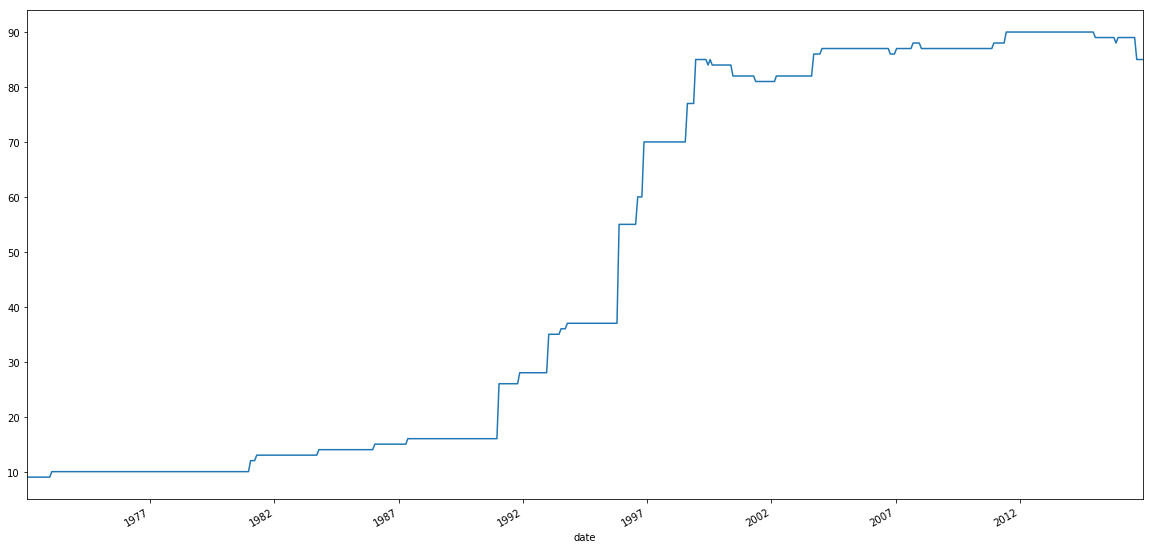

In [28]:
total_values.plot()

In [29]:
total_values.describe(percentiles=[0.9])

count    540.000000
mean      48.062963
std       34.601893
min        9.000000
50%       37.000000
90%       89.000000
max       90.000000
dtype: float64

(120, 91)


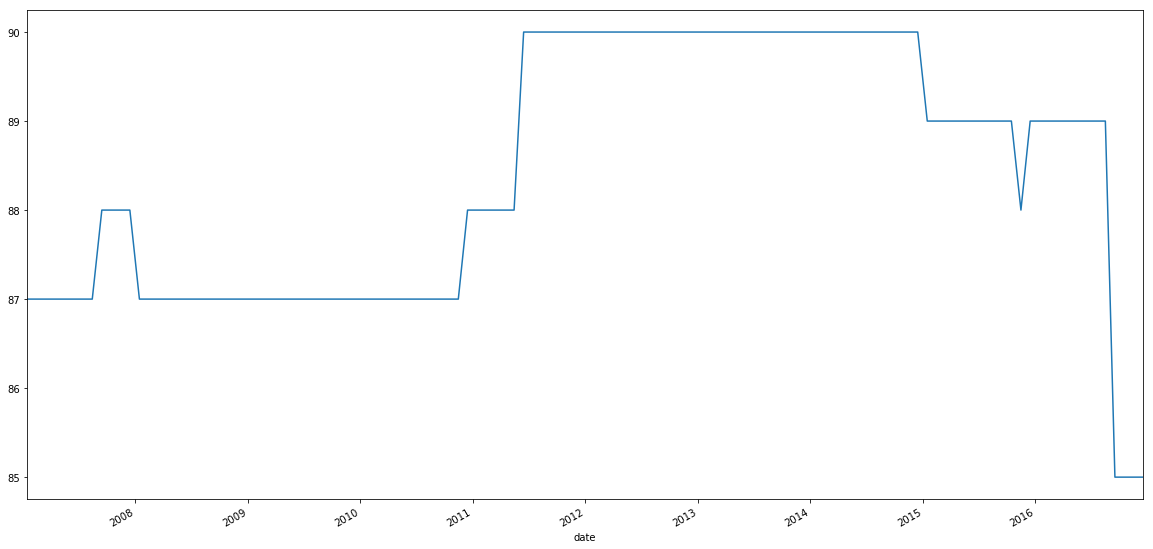

In [30]:
threshold_date = dt.datetime(2007,1,15)
exchange_filtered_df = exchange_df[threshold_date:]
print(exchange_filtered_df.shape)
values_filtered = (exchange_filtered_df.shape[1] - exchange_filtered_df.isnull().sum(axis=1))
values_filtered.plot()

In [31]:
values_filtered.describe()

count    120.000000
mean      88.416667
std        1.447010
min       85.000000
25%       87.000000
50%       89.000000
75%       90.000000
max       90.000000
dtype: float64

### Which currencies have missing values? Are they only a few or the missing values are spread across currencies?

In [32]:
missing_vals = exchange_filtered_df.isnull().sum(axis=0)
currencies_with_missing = missing_vals[missing_vals>0]
print(currencies_with_missing.shape)
currencies_with_missing.sort_values()

(9,)


USD/BMD     4
USD/LBP     4
USD/RSD     8
USD/JOD    24
USD/SDD    46
USD/EEK    47
USD/ZMK    48
USD/XCD    53
USD/ZMW    76
dtype: int64

Let's calculate the percentage missing

In [33]:
n_values = exchange_filtered_df.shape[0]
print('Total values: {}'.format(n_values))
missing_perc = currencies_with_missing / n_values
missing_perc.sort_values()

Total values: 120


USD/BMD    0.033333
USD/LBP    0.033333
USD/RSD    0.066667
USD/JOD    0.200000
USD/SDD    0.383333
USD/EEK    0.391667
USD/ZMK    0.400000
USD/XCD    0.441667
USD/ZMW    0.633333
dtype: float64

### Let's remove the currencies that have missing values from 2007 to 2017

In [34]:
missing_vals.index[missing_vals==0].shape

(82,)

In [35]:
exchange_filt2_df = exchange_filtered_df[missing_vals.index[missing_vals==0]]
exchange_filt2_df.shape

(120, 82)

In [36]:
exchange_filt2_df.isnull().sum().sum()

0

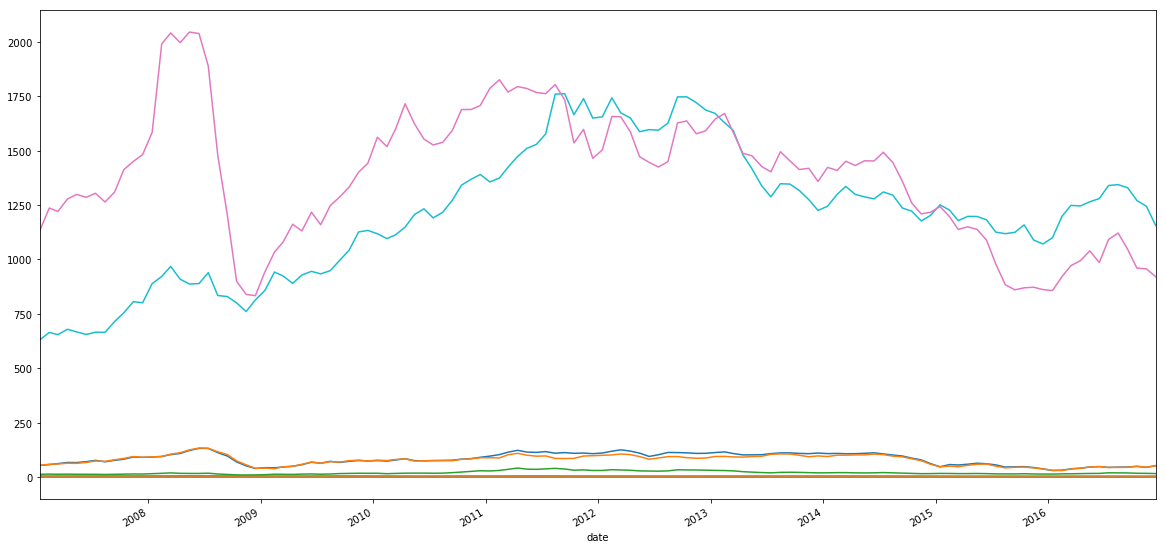

In [37]:
exchange_filt2_df.plot(legend=False)

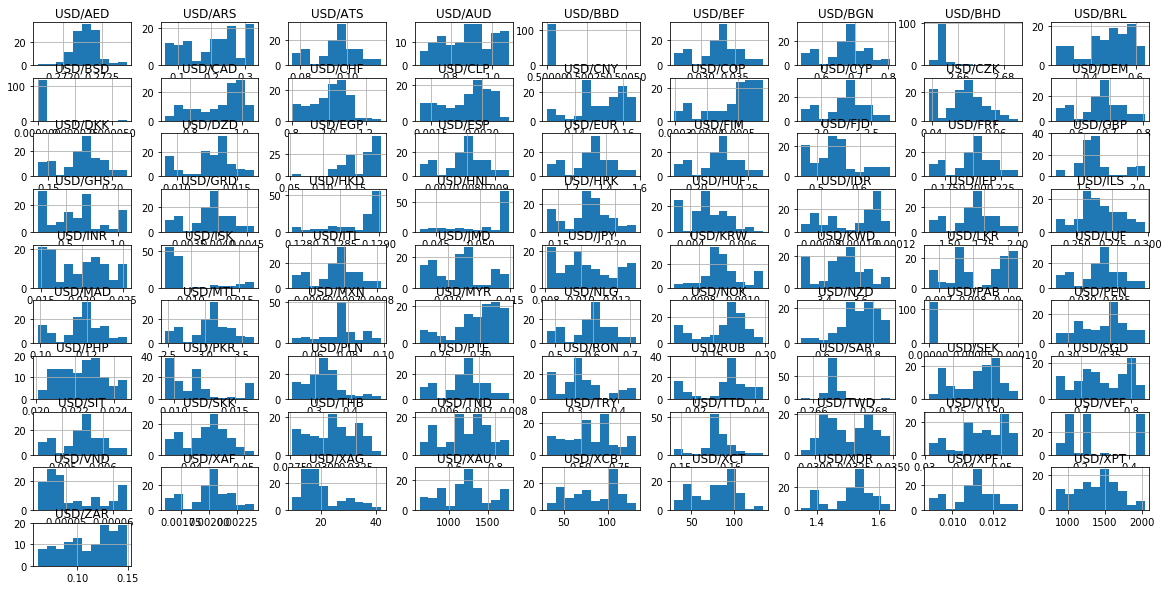

In [38]:
ax = exchange_filt2_df.hist()

In [39]:
import seaborn as sns

/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


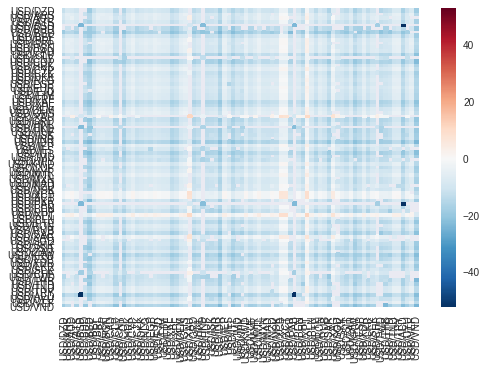

In [40]:
sns.heatmap(np.log(exchange_filt2_df.cov()))

### Let's look at the standarized data

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


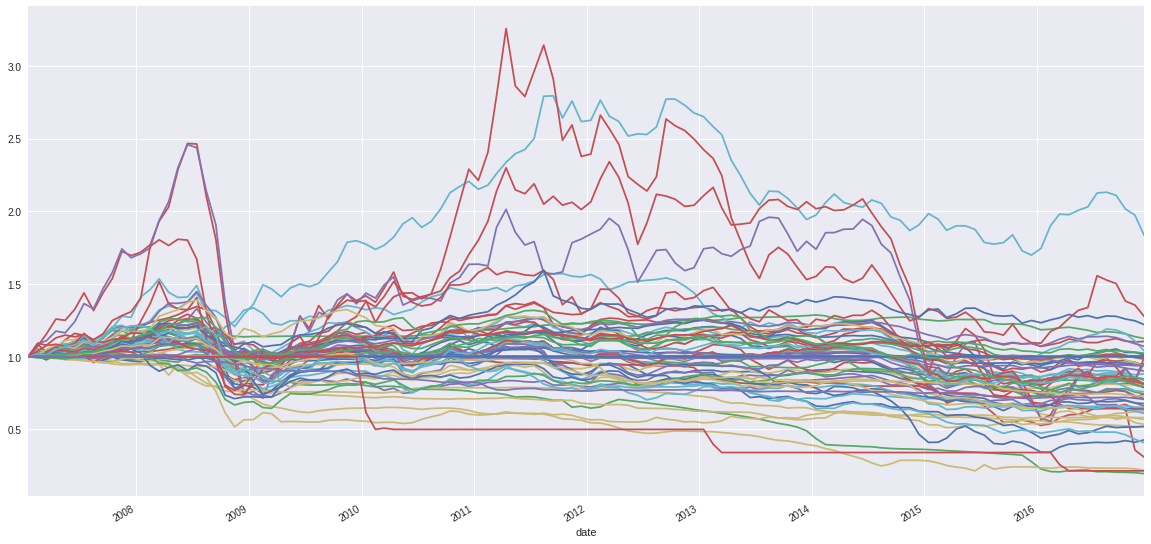

In [42]:
exchange_std_df = exchange_filt2_df / exchange_filt2_df.iloc[0,:]
ax = exchange_std_df.plot(legend=False)

In [43]:
exchange_std_df.head()

,USD/DZD,USD/ARS,USD/AUD,USD/ATS,USD/BSD,USD/BHD,USD/BBD,USD/BEF,USD/BRL,USD/GBP,...,USD/CHF,USD/TWD,USD/THB,USD/TTD,USD/TND,USD/TRY,USD/AED,USD/UYU,USD/VEF,USD/VND
date,,,,,,,,,,,,,,,,,,,,,
2007-01-15,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-02-15,0.997990,0.996749,1.000665,1.007172,1.0,1.000189,1.0,1.007174,1.020595,0.999796,...,1.003469,0.993579,1.039150,1.002722,1.001641,1.020769,1.000220,1.002725,1.000021,1.004818
2007-03-15,1.010718,0.995662,1.013265,1.019694,1.0,1.000641,1.0,1.019690,1.023482,0.994078,...,1.020902,0.992204,1.076782,1.006266,1.006815,1.012667,1.000661,1.005911,0.999807,1.000964
2007-04-15,1.013601,0.996264,1.057738,1.040754,1.0,1.000226,1.0,1.040747,1.052974,1.015315,...,1.025988,0.988371,1.085360,1.006076,1.014379,1.049169,1.000331,1.013964,1.000129,0.999534
2007-05-15,1.009709,0.997488,1.054722,1.040638,1.0,1.000528,1.0,1.040653,1.077611,1.013222,...,1.018291,0.984702,1.070816,1.007532,1.012462,1.068840,1.000624,1.017321,1.000086,0.999326


In [44]:
import bokeh.plotting as bk
from bokeh.palettes import Spectral11
import bokeh.charts as bkc

# output to Notebook
bk.output_notebook()

# create a new plot
p = bk.figure(plot_width=2400, plot_height=1200, x_axis_type="datetime", tools='pan, box_zoom, wheel_zoom, reset, save',
           title='Exchange rates',
           x_axis_label='date', y_axis_label='USD/<currency>'
)

# add some renderers
p = bkc.TimeSeries(exchange_std_df, legend=False)

# show the results
bk.show(p)

Loading BokehJS ...

/home/miguel/anaconda3/envs/keras/lib/python3.6/site-packages/bokeh/core/json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):


### Let's save the clean data

In [45]:
exchange_filt2_df.to_csv(DATA_PATH + 'filtered_rates.csv')